In [28]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
csv_filename = ""
if csv_filename:
    df = pd.read_csv()
else:
    list_of_files = glob.glob('stats/*')
    latest_csv = max(list_of_files, key=os.path.getctime)
    df = pd.read_csv(latest_csv + "/runs.out")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4200 non-null   object 
 1   optim      4200 non-null   int64  
 2   size       4200 non-null   int64  
 3   time       4200 non-null   float64
 4   bandwidth  4200 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 164.2+ KB


In [34]:
optims = df["optim"].unique()
names = df["name"].unique()
df["bandwidthGB"] = df["bandwidth"] / 1e9

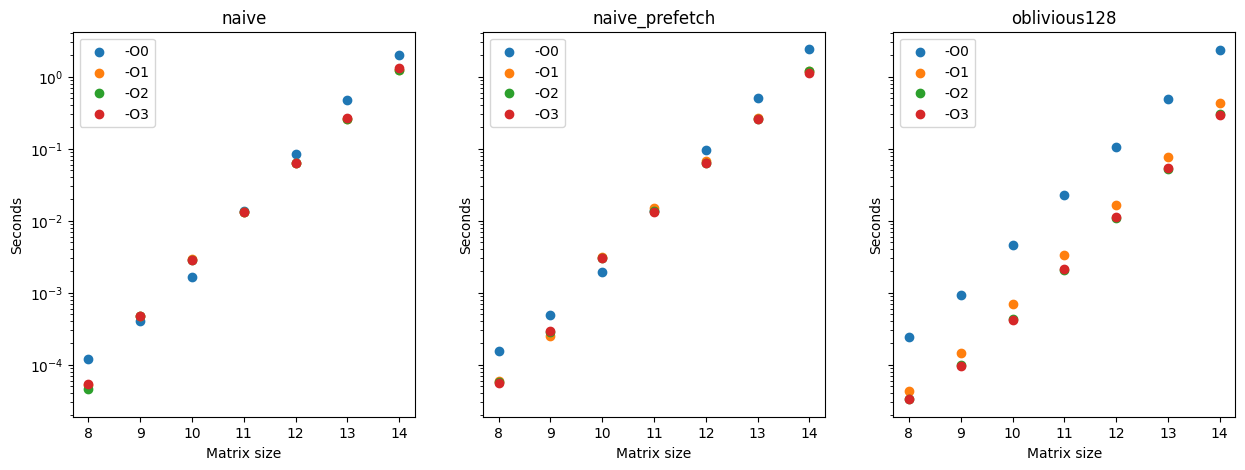

In [46]:
fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

means = df.groupby(['name', 'optim', 'size']).mean()
stds = df.groupby(['name', 'optim', 'size']).std()
for i, name in enumerate(names):
    for optim in optims:
        datapoints = means.loc[name, optim]
        x = list(datapoints.index)
        y = list(datapoints['time'])
        plt.yscale("log")
        ax[i].scatter(x, y, label=f"-O{optim}")
        ax[i].legend(loc="upper left")
        ax[i].set_ylabel("Seconds")
        ax[i].set_xlabel("Matrix size")
        ax[i].title.set_text(name)
plt.show()

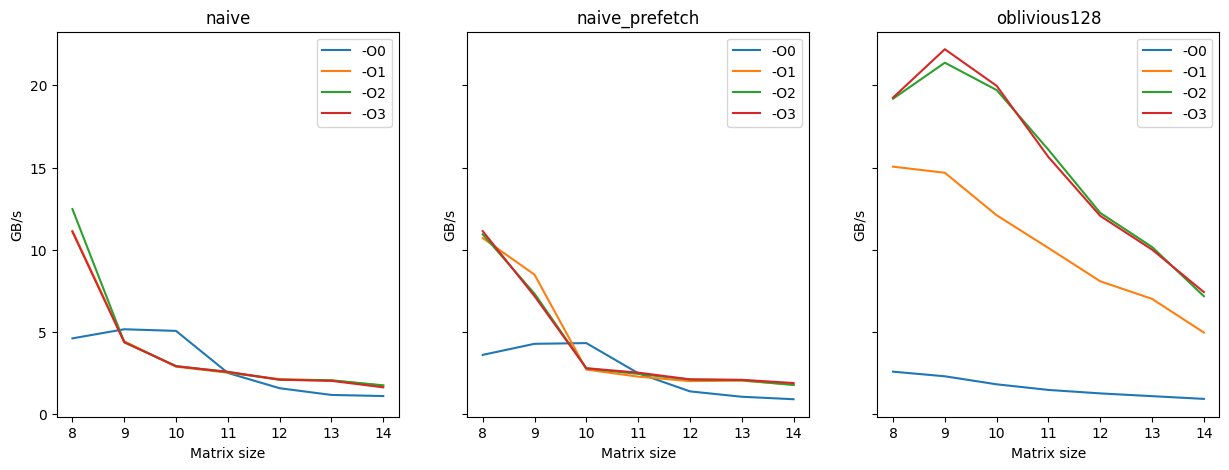

In [47]:
fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

means = df.groupby(['name', 'optim', 'size']).mean()
stds = df.groupby(['name', 'optim', 'size']).std()
for i, name in enumerate(names):
    for optim in optims:
        datapoints = means.loc[name, optim]
        x = list(datapoints.index)
        y = list(datapoints['bandwidthGB'])
        ax[i].plot(x, y, label=f"-O{optim}")
        ax[i].legend(loc="upper right")
        ax[i].set_ylabel("GB/s")
        ax[i].set_xlabel("Matrix size")
        ax[i].title.set_text(name)
plt.show()

In [32]:
optim_lvl = 3
means.loc['naive', optim_lvl], means.loc['naive_prefetch', optim_lvl], means.loc['oblivious128', optim_lvl]

(          time     bandwidth
 size                        
 8     0.000053  1.108848e+10
 9     0.000481  4.365513e+09
 10    0.002885  2.907910e+09
 11    0.013064  2.568870e+09
 12    0.064343  2.087334e+09
 13    0.266583  2.016767e+09
 14    1.324240  1.623234e+09,
           time     bandwidth
 size                        
 8     0.000056  1.112868e+10
 9     0.000293  7.171058e+09
 10    0.003013  2.784884e+09
 11    0.013328  2.517915e+09
 12    0.063684  2.107657e+09
 13    0.258003  2.081048e+09
 14    1.143668  1.884556e+09,
           time     bandwidth
 size                        
 8     0.000033  1.925510e+10
 9     0.000095  2.219901e+10
 10    0.000420  1.997135e+10
 11    0.002162  1.563602e+10
 12    0.011180  1.205582e+10
 13    0.054030  1.000634e+10
 14    0.299056  7.418529e+09)

In [33]:
stds.loc['naive', optim_lvl], stds.loc['naive_prefetch', optim_lvl], stds.loc['oblivious128', optim_lvl]

(          time     bandwidth
 size                        
 8     0.000022  3.236594e+09
 9     0.000014  1.213382e+08
 10    0.000021  2.072934e+07
 11    0.000162  3.178642e+07
 12    0.001673  5.289155e+07
 13    0.011055  7.078824e+07
 14    0.041768  5.059186e+07,
           time     bandwidth
 size                        
 8     0.000032  3.677347e+09
 9     0.000016  4.214378e+08
 10    0.000033  3.018857e+07
 11    0.000139  2.629206e+07
 12    0.000406  1.325800e+07
 13    0.002440  1.949643e+07
 14    0.070995  1.127319e+08,
           time     bandwidth
 size                        
 8     0.000019  6.441420e+09
 9     0.000002  4.980367e+08
 10    0.000009  3.924269e+08
 11    0.000203  1.292921e+09
 12    0.000772  7.449027e+08
 13    0.004835  7.993623e+08
 14    0.058512  1.269121e+09)